In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import io
from google.colab import files
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import neighbors
from sklearn.svm import SVR
from warnings import filterwarnings
filterwarnings('ignore')
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge
from sklearn import model_selection 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor


In [87]:
uploaded = files.upload()
df=pd.read_csv(io.BytesIO(uploaded['turkey_car_market.csv']))

In [88]:
df.shape

(9044, 15)

In [89]:
df.head()

,İlan Tarihi,Marka,Arac Tip Grubu,Arac Tip,Model Yıl,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat
0,27/05/2020,Jaguar,XF,2.0 D Prestige Plus,2017.0,Dizel,Otomatik Vites,1801-2000 cc,176-200 BG,Lacivert,Hatchback 5 Kapı,Galeriden,2. El,26100,634500
1,16/06/2020,Acura,CL,-,2015.0,Dizel,Yarı Otomatik Vites,1301-1600 cc,101-125 BG,Mavi,Sedan,Sahibinden,2. El,127000,151500
2,14/06/2020,Acura,CL,2.2,1994.0,Benzin/LPG,Düz Vites,1301-1600 cc,101-125 BG,Turkuaz,Sedan,Sahibinden,2. El,175000,19750
3,11/06/2020,Acura,CL,-,2013.0,Dizel,Düz Vites,1301-1600 cc,76-100 BG,Kahverengi,Sedan,Sahibinden,2. El,325,52000
4,11/06/2020,Acura,CL,2.2,2010.0,Dizel,Otomatik Vites,1801-2000 cc,151-175 BG,Beyaz,Sedan,Sahibinden,2. El,207000,148750


In [90]:
df.isnull().sum()

İlan Tarihi       0
Marka             0
Arac Tip Grubu    0
Arac Tip          0
Model Yıl         0
Yakıt Turu        0
Vites             0
CCM               0
Beygir Gucu       0
Renk              0
Kasa Tipi         0
Kimden            0
Durum             0
Km                0
Fiyat             0
dtype: int64

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9044 entries, 0 to 9043
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   İlan Tarihi     9044 non-null   object 
 1   Marka           9044 non-null   object 
 2   Arac Tip Grubu  9044 non-null   object 
 3   Arac Tip        9044 non-null   object 
 4   Model Yıl       9044 non-null   float64
 5   Yakıt Turu      9044 non-null   object 
 6   Vites           9044 non-null   object 
 7   CCM             9044 non-null   object 
 8   Beygir Gucu     9044 non-null   object 
 9   Renk            9044 non-null   object 
 10  Kasa Tipi       9044 non-null   object 
 11  Kimden          9044 non-null   object 
 12  Durum           9044 non-null   object 
 13  Km              9044 non-null   int64  
 14  Fiyat           9044 non-null   int64  
dtypes: float64(1), int64(2), object(12)
memory usage: 1.0+ MB


In [92]:
print(len(df['Marka'].unique()))
markalar=df['Marka'].unique()
markalar

36


array(['Jaguar', 'Acura', 'Jeep', 'Hyundai', 'Alfa Romeo', 'Audi',
       'Mercedes', 'Volkswagen', 'Land Rover', 'BMW', 'Dacia', 'Renault',
       'Peugeot', 'Chevrolet', 'Chery', 'Citroen', 'Chrysler', 'Fiat',
       'Ford', 'Honda', 'Geely', 'Infiniti', 'Isuzu', 'Kia', 'Lada',
       'Maserati', 'Mazda', 'Mini', 'Mitsubishi', 'Nissan', 'Opel',
       'Porsche', 'Rover', 'Seat', 'Skoda', 'Tofaş'], dtype=object)

In [93]:
print(len(df['Arac Tip'].unique()))
car_type=df['Arac Tip'].unique()
print(car_type)

1759
['2.0 D Prestige Plus' '-' '2.2' ... 'SLX ie' 'SL' 'L']


In [94]:
len(df[df['Arac Tip']=='-'])  #bilinmeyen kaç değer var ona bakıyoruz

55

In [95]:
print(len(df['Yakıt Turu'].unique()))
yakıt_type=df['Yakıt Turu'].unique()
yakıt_type

5


array(['Dizel', 'Benzin/LPG', 'Hibrit', 'Benzin', 'Elektrik'],
      dtype=object)

In [96]:
print(len(df['Vites'].unique()))
vites_type=df['Vites'].unique()
vites_type

3


array(['Otomatik Vites', 'Yarı Otomatik Vites', 'Düz Vites'], dtype=object)

In [97]:
print('Farklı CCM değer sayısı : ', len(df['CCM'].unique()))
CCM_type=df['CCM'].unique()
print(CCM_type)
print('Bilmiyorum değeri girilmiş CCM sayısı : ', len(df[df['CCM']=='Bilmiyorum']))

Farklı CCM değer sayısı :  15
['1801-2000 cc' '1301-1600 cc' '1601-1800 cc' '1300 cc ve altı'
 '2501-3000 cc' 'Bilmiyorum' '2001-2500 cc' '3501-4000 cc' '3001-3500 cc'
 '4001-4500 cc' '-' '6001 cc ve üzeri' '5501-6000 cc' '5001-5500 cc'
 '4501-5000 cc']
Bilmiyorum değeri girilmiş CCM sayısı :  108


In [98]:
print('Farklı Beygir gucu değer sayısı : ', len(df['Beygir Gucu'].unique()))
power=df['Beygir Gucu'].unique()
print(power)
print('Bilmiyorum değeri girilmiş Beygir Gucu sayısı : ', len(df[df['Beygir Gucu']=='Bilmiyorum']))

Farklı Beygir gucu değer sayısı :  19
['176-200 BG' '101-125 BG' '76-100 BG' '151-175 BG' '100 BG ve altı'
 '201-225 BG' '126-150 BG' 'Bilmiyorum' '276-300 BG' '226-250 BG'
 '251-275 BG' '301-325 BG' '326-350 BG' '376-400 BG' '51-75 BG' '-'
 '601 BG ve üzeri' '50 BG ve altı' '451-475 BG']
Bilmiyorum değeri girilmiş Beygir Gucu sayısı :  5549


In [99]:
df['car_age']=2020-df['Model Yıl']     #modelin yılı yerine yaşı ile işlem yapıcağız
df['car_age'].head()

0     3.0
1     5.0
2    26.0
3     7.0
4    10.0
Name: car_age, dtype: float64

In [100]:
df.drop(['Model Yıl'], axis=1,inplace=True)    #işimize yaramayan kolonları siliyoruz
df.drop(['İlan Tarihi'],axis=1,inplace=True)
df.columns

Index(['Marka', 'Arac Tip Grubu', 'Arac Tip', 'Yakıt Turu', 'Vites', 'CCM',
       'Beygir Gucu', 'Renk', 'Kasa Tipi', 'Kimden', 'Durum', 'Km', 'Fiyat',
       'car_age'],
      dtype='object')

In [101]:
'''öncelikle araç tipindeki - ile girilmiş verileri düzenleyeceğiz. az sayıda bir veri var.
ancak o kolonda birbirinden farklı çok değer olduğu için onları silmek yerine adını diğer olarak değiştireceğiz'''
df['Arac Tip']=df['Arac Tip'].str.replace('-','Diger')
print(len(df[df['Arac Tip']=='-']))
len(df[df['Arac Tip']=='Diger'])

0


55

In [102]:
#CCM deki 108 tane eksik olan verilerin tamamen silinmesinin daha iyi olacağını düşünüyorum. Veri setimizin sayısına göre sorun yaratmayacak kadar az veri var.
CCM_drop=df[df['CCM']=='Bilmiyorum'].index
df.drop(CCM_drop,axis=0,inplace=True)

In [103]:
df.shape

(8936, 14)

In [104]:
l_encoder1=LabelEncoder()
df['Marka']=l_encoder1.fit_transform(df['Marka'])

In [105]:
cars={}
car_name = list(l_encoder1.inverse_transform([i for i in range(35)]))
for i,x in enumerate(car_name):
  if i not in cars.keys():
    cars[i] =x

In [106]:
pd.DataFrame(cars.items(), columns=['label_values', 'car_name']).head()

,label_values,car_name
0,0,Acura
1,1,Alfa Romeo
2,2,Audi
3,3,BMW
4,4,Chevrolet


In [109]:
l_encoder = LabelEncoder()
columns = ['Arac Tip Grubu', 'Arac Tip','Yakıt Turu', 'Vites', 'CCM', 'Beygir Gucu', 'Renk', 'Kasa Tipi','Kimden', 'Durum']
for i in columns:
  df[i]=l_encoder.fit_transform(df[i])

In [112]:
df.head()

,Marka,Arac Tip Grubu,Arac Tip,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat,car_age
0,15,374,1082,2,1,4,5,17,5,0,1,26100,634500,3.0
1,0,126,1612,2,2,2,2,18,9,1,1,127000,151500,5.0
2,0,126,1171,1,0,2,2,23,9,1,1,175000,19750,26.0
3,0,126,1612,2,0,2,17,13,9,1,1,325,52000,7.0
4,0,126,1171,2,1,4,4,4,9,1,1,207000,148750,10.0


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8936 entries, 0 to 9043
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Marka           8936 non-null   int64  
 1   Arac Tip Grubu  8936 non-null   int64  
 2   Arac Tip        8936 non-null   int64  
 3   Yakıt Turu      8936 non-null   int64  
 4   Vites           8936 non-null   int64  
 5   CCM             8936 non-null   int64  
 6   Beygir Gucu     8936 non-null   int64  
 7   Renk            8936 non-null   int64  
 8   Kasa Tipi       8936 non-null   int64  
 9   Kimden          8936 non-null   int64  
 10  Durum           8936 non-null   int64  
 11  Km              8936 non-null   int64  
 12  Fiyat           8936 non-null   int64  
 13  car_age         8936 non-null   float64
dtypes: float64(1), int64(13)
memory usage: 1.0 MB


In [114]:
df['Beygir Gucu']=df['Beygir Gucu'].replace(18,np.nan)  #18 bilmiyorumu ifade ediyor. onları ilk önce nan yapıyoruz. daha sonra komşularına göre dolduracağız
df.isnull().sum()

Marka                0
Arac Tip Grubu       0
Arac Tip             0
Yakıt Turu           0
Vites                0
CCM                  0
Beygir Gucu       5484
Renk                 0
Kasa Tipi            0
Kimden               0
Durum                0
Km                   0
Fiyat                0
car_age              0
dtype: int64

In [115]:
imputer = KNNImputer(n_neighbors=5)
df['Beygir Gucu']=imputer.fit_transform(df[['Beygir Gucu']])
df.isnull().sum()

Marka             0
Arac Tip Grubu    0
Arac Tip          0
Yakıt Turu        0
Vites             0
CCM               0
Beygir Gucu       0
Renk              0
Kasa Tipi         0
Kimden            0
Durum             0
Km                0
Fiyat             0
car_age           0
dtype: int64

In [117]:
df['Beygir Gucu'] = round(df['Beygir Gucu'])   #doldururken float olarak bıraktığı için tam değere yuvarlıyorum

In [119]:
q1 = df["Fiyat"].quantile(0.25)
q3 = df["Fiyat"].quantile(0.75)      #aykırır değerleri siliyoruz

IOC = q3 - q1

alt_sınır = q1 - 1.5*IOC
üst_sınır = q3 + 1.5*IOC

sınır = (df["Fiyat"] < alt_sınır) | (df["Fiyat"] > üst_sınır)
df["Aykırı_Deger"] = sınır
df = df.loc[df["Aykırı_Deger"] == False]
del df["Aykırı_Deger"]

In [121]:
y=df['Fiyat']
x=df.drop(['Fiyat'],axis=1)

In [126]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)
x_train.head()

,Marka,Arac Tip Grubu,Arac Tip,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Kimden,Durum,Km,car_age
2627,9,190,478,2,0,2,7.0,4,9,0,1,53000,2.0
7387,29,299,1736,1,0,2,7.0,4,9,0,1,68000,23.0
4361,22,78,1034,2,2,2,2.0,16,5,1,1,94500,5.0
5318,26,99,644,1,2,2,17.0,22,5,0,1,180000,14.0
5390,26,156,471,2,0,2,17.0,4,5,0,1,262000,20.0


In [127]:
def compML(alg,x_train,y_train,x_test,y_test):     #ilk önce tüm modellerde ilkel test hatasını buluyoruz
    #modelleme
    model=alg().fit(x_train,y_train)
    y_pred=model.predict(x_test)
    RMSE= np.sqrt(mean_squared_error(y_test,y_pred))
    model_ismi= alg.__name__
    print(model_ismi ," Modeli Test Hatası :", RMSE)

models=[LGBMRegressor, Lasso,
        XGBRegressor, LinearRegression,
        GradientBoostingRegressor,
        RandomForestRegressor, ElasticNet,
        DecisionTreeRegressor, Ridge,
        MLPRegressor,
        KNeighborsRegressor, 
        SVR]

for i in models:
    compML(i,x_train,y_train,x_test,y_test) 

LGBMRegressor  Modeli Test Hatası : 15888.743047972348
Lasso  Modeli Test Hatası : 35760.18269559875
[22:55:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor  Modeli Test Hatası : 20546.39695071808
LinearRegression  Modeli Test Hatası : 35760.30328951825
GradientBoostingRegressor  Modeli Test Hatası : 20463.536331009487
RandomForestRegressor  Modeli Test Hatası : 16692.84893224494
ElasticNet  Modeli Test Hatası : 37071.78488704977
DecisionTreeRegressor  Modeli Test Hatası : 23302.35177400624
Ridge  Modeli Test Hatası : 35760.195674235736
MLPRegressor  Modeli Test Hatası : 59858.182167508494
KNeighborsRegressor  Modeli Test Hatası : 47182.32671526696
SVR  Modeli Test Hatası : 62275.91736447188


In [130]:
lgbm=LGBMRegressor()     #en iyi modeli seçiyoruz
lgbm.fit(x_train,y_train)

lgbm_tahmin = lgbm.predict(x_test)

r2_skor = r2_score(y_test, lgbm_tahmin)
hata_skor = np.sqrt(mean_squared_error(y_test, lgbm_tahmin))

print("R2_skoru: ", r2_skor)
print("Hata Kare: ", hata_skor)

R2_skoru:  0.9312280123179733
Hata Kare:  15888.743047972348


In [131]:
lgbm_params={'learning_rate':[0.01, 0.1, 0.5],   #en iyi hiperparametreleri bulmaya çalışıyoruz
            'n_estimators':[200,500,1000],
            'max_depth':[5, 7, 10],
             'colsample_bytree':[0.7, 0.9, 1.0],
             'subsample': [0.5, 0.7, 0.6, 0.4]
             }
lgbm_cv_model=GridSearchCV(lgbm,lgbm_params,cv=10,n_jobs=-1,verbose=2).fit(x_train,y_train)

Fitting 10 folds for each of 324 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed: 28.4min finished


In [132]:
lgbm_cv_model.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 10,
 'n_estimators': 500,
 'subsample': 0.5}

In [138]:
lgb_tuned=LGBMRegressor(learning_rate = lgbm_cv_model.best_params_['learning_rate'],
                        max_depth = lgbm_cv_model.best_params_['max_depth'],
                        n_estimators = lgbm_cv_model.best_params_['n_estimators'],
                        colsample_bytree = lgbm_cv_model.best_params_['colsample_bytree'],
                        subsample=lgbm_cv_model.best_params_['subsample']).fit(x_train,y_train)

y_pred=lgb_tuned.predict(x_test)

r2_skor = r2_score(y_test, y_pred)
hata_skor = np.sqrt(mean_squared_error(y_test, y_pred))
adjusted_r2_skor = 1 - (1-r2_skor)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

print("R2_skoru: ", r2_skor)
print("Hata Kare: ", hata_skor)
print(adjusted_r2_skor)

R2_skoru:  0.939771258425962
Hata Kare:  14869.133060707172
0.9394507616431284


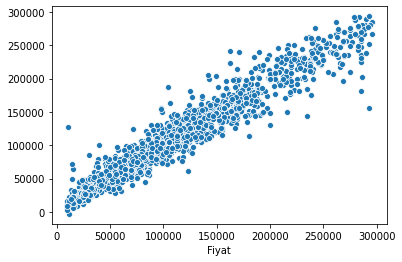

In [134]:
sns.scatterplot(x=y_test,y=y_pred)

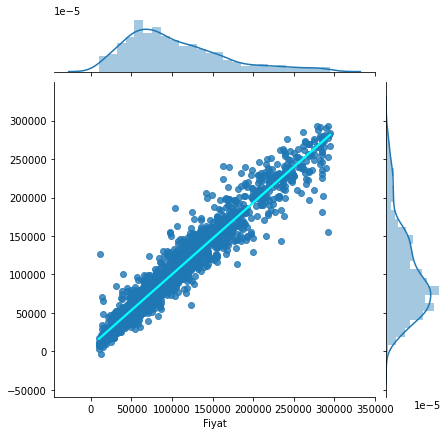

In [135]:
sns.jointplot(x=y_test, y=y_pred,  kind='reg',
                  joint_kws={'line_kws':{'color':'cyan'}})

In [136]:
sonuc = pd.DataFrame({'Gerçek Değerler': np.array(y_test).flatten(), 'Tahminler': y_pred.flatten(),'Fark':np.array(y_test).flatten()-y_pred.flatten()})
sonuc.head(10)

,Gerçek Değerler,Tahminler,Fark
0,60000,58150.175038,1849.824962
1,79750,103576.349602,-23826.349602
2,64000,62545.507640,1454.492360
3,55900,56495.820476,-595.820476
4,79000,56573.387791,22426.612209
5,44500,38799.062596,5700.937404
6,197000,153002.203087,43997.796913
7,57500,53975.129005,3524.870995
8,76000,75910.337003,89.662997
9,134750,135513.097106,-763.097106
